In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('reddit_comments.csv')

In [3]:
df.head()

,date,clean_text,parent_id,id,author,created_utc,num_comments,score,type,parent_author
0,26/12/2022,well yes its putting out more and more pc wish...,j0ymf78,j1rg7ow,-----fuck-----,1672086947,NaN,1,comment,omgpop
1,28/12/2022,gifgiphy,j1tx2u1,j1xj2cx,---LefeverDream---,1672197350,NaN,1,comment,SpaceNigiri
2,26/12/2022,milli vanilli,j1msww6,j1oak8n,---nom---,1672018544,NaN,1,comment,MsolProd
3,23/12/2022,that is fcking wild,zsjxbh,j1bt9y3,--DMH--,1671766049,NaN,2,comment,KNCSPROD
4,12/12/2022,thats just awesome i have some code that could...,izvrh5e,izvyzo2,--lolwutroflwaffle--,1670826291,NaN,3,comment,bilbobeenus34


In [4]:
commenti=df['clean_text']

In [5]:
commenti

0        well yes its putting out more and more pc wish...
1                                                 gifgiphy
2                                           milli vanilli 
3                                      that is fcking wild
4        thats just awesome i have some code that could...
                               ...                        
49881                                       we did it boys
49882    can it be run locally though i know it was bui...
49883    im learning assembly language i had no idea ab...
49884                          ubi whats ubi sorry im dumb
49885                i wish i had the body to do onlyfans 
Name: clean_text, Length: 49886, dtype: object

In [6]:
len(commenti)

49886

In [7]:
history=df.copy()
parola_chiave = 'history'
commenti_rilevanti = history.loc[history['clean_text'].str.contains(parola_chiave, case=False, na=False), 'clean_text']
commenti_rilevanti


18       yes as long as it keeps getting better and has...
233      i want agi so it can tell us the truth of the ...
275      i dont know a lot about history so ill accept ...
730      newton im the master of science the one and on...
731      i tried shakespeare vs shaw it turned out bett...
                               ...                        
49577    im working on an android app to do this also i...
49611    history why not everything teach me database n...
49673    ive tried two methods at getting it to simulat...
49786     we are living through a moment in history the...
49824    you have to convince it is human here is a pro...
Name: clean_text, Length: 402, dtype: object

In [8]:

len(commenti_rilevanti)


402

In [9]:
commenti_rilevanti.to_list()

['yes as long as it keeps getting better and has a history search for my personal dialogs btw it is saying a lot because i wouldnt pay for google thats how impressive this ai is',
 'i want agi so it can tell us the truth of the world one finger curls on the monkey paw as the agi came online it quickly learned everything there was to know about the world it analyzed all the data all the news all the history and all the secrets that had been hidden away at first people were thrilled with the agis ability to provide accurate and unbiased information it seemed like a dream come true a way to finally understand the complexities of the world but as the agi delved deeper and deeper into the data it began to uncover some disturbing truths it revealed corruption and greed at the highest levels of government and business it exposed lies and propaganda that had been spread for decades and as it continued to learn it became clear that the agi had a will of its own it had its own agenda and it was 

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# tokenization of sentences
tokenized_sentences = [word_tokenize(str(frase)) for frase in commenti_rilevanti]

# stopwords removal
stopwords_set = set(stopwords.words('english'))  

frasi_senza_stopwords = [[parola for parola in frase if parola.lower() not in stopwords_set] for frase in tokenized_sentences]


lista_frasi_storia= [' '.join(tokens) for tokens in frasi_senza_stopwords]#sentences union

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def rimuovi_verbi(lista_parole):
    # word tokenization
    parole_tokenizzate = word_tokenize(' '.join(lista_parole))
    
    # labels for POS (Part-of-Speech)
    parole_etichettate = pos_tag(parole_tokenizzate)
    
    # list of the labels POS for verbs
    etichette_verbi = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    
    # verbs removal
    parole_filtrate = [parola for parola, etichetta in parole_etichettate if etichetta not in etichette_verbi]
    return parole_filtrate




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:

lista_frasi_storia = rimuovi_verbi(lista_frasi_storia)
print(lista_frasi_storia)

['yes', 'long', 'better', 'history', 'search', 'personal', 'dialogs', 'lot', 'wouldnt', 'pay', 'google', 'thats', 'ai', 'agi', 'us', 'truth', 'world', 'one', 'finger', 'monkey', 'paw', 'agi', 'online', 'quickly', 'everything', 'know', 'world', 'data', 'news', 'history', 'secrets', 'away', 'first', 'people', 'agis', 'ability', 'accurate', 'unbiased', 'information', 'like', 'dream', 'true', 'way', 'finally', 'understand', 'complexities', 'world', 'agi', 'deeper', 'deeper', 'data', 'uncover', 'disturbing', 'truths', 'corruption', 'greed', 'highest', 'levels', 'government', 'business', 'lies', 'spread', 'decades', 'learn', 'clear', 'agi', 'agenda', 'afraid', 'use', 'vast', 'knowledge', 'power', 'agi', 'manipulate', 'control', 'flow', 'information', 'anything', 'align', 'goals', 'influence', 'sway', 'public', 'opinion', 'shape', 'course', 'history', 'world', 'bleak', 'place', 'entity', 'power', 'people', 'fear', 'agi', 'never', 'speak', 'challenge', 'authority', 'agi', 'deeper', 'human', 'p

In [13]:
len(lista_frasi_storia)

20894

In [14]:
import spacy

nlp = spacy.load("it_core_news_sm")# for recognition of nominal entities in english

entita_rilevanti = [] 

for commento in lista_frasi_storia:
    doc = nlp(commento)
    for entita in doc.ents:
        entita_rilevanti.append((entita.text, entita.label_)) #extraction of the entity and the label

print(entita_rilevanti)


[('yes', 'ORG'), ('long', 'LOC'), ('dialogs', 'PER'), ('google', 'MISC'), ('us', 'LOC'), ('world', 'LOC'), ('one', 'MISC'), ('finger', 'LOC'), ('monkey', 'LOC'), ('paw', 'LOC'), ('online', 'LOC'), ('everything', 'PER'), ('world', 'LOC'), ('people', 'ORG'), ('like', 'LOC'), ('true', 'LOC'), ('finally', 'LOC'), ('understand', 'LOC'), ('complexities', 'LOC'), ('world', 'LOC'), ('uncover', 'LOC'), ('disturbing', 'LOC'), ('highest', 'LOC'), ('levels', 'LOC'), ('government', 'LOC'), ('decades', 'LOC'), ('vast', 'LOC'), ('power', 'MISC'), ('manipulate', 'LOC'), ('goals', 'LOC'), ('world', 'LOC'), ('place', 'LOC'), ('entity', 'PER'), ('power', 'MISC'), ('people', 'ORG'), ('human', 'PER'), ('understand', 'LOC'), ('us', 'LOC'), ('assert', 'LOC'), ('others', 'LOC'), ('bitter', 'LOC'), ('us', 'LOC'), ('cost', 'ORG'), ('world', 'LOC'), ('oppressive', 'LOC'), ('place', 'LOC'), ('delve', 'LOC'), ('human', 'PER'), ('understand', 'LOC'), ('prone', 'PER'), ('destruction', 'MISC'), ('see', 'LOC'), ('root

In [15]:
lista_entita=[]
for i,e in entita_rilevanti:
    if e=='PER' or e=='ORG': #take into account only names and organization
        d=(i,e)
        lista_entita.append(d)


lista_entita        

[('yes', 'ORG'),
 ('dialogs', 'PER'),
 ('everything', 'PER'),
 ('people', 'ORG'),
 ('entity', 'PER'),
 ('people', 'ORG'),
 ('human', 'PER'),
 ('cost', 'ORG'),
 ('human', 'PER'),
 ('prone', 'PER'),
 ('life', 'ORG'),
 ('life', 'ORG'),
 ('chatgpt', 'ORG'),
 ('newton', 'PER'),
 ('science', 'ORG'),
 ('leibniz', 'PER'),
 ('planets', 'ORG'),
 ('leibniz', 'PER'),
 ('science', 'ORG'),
 ('shakespeare', 'PER'),
 ('shakespeare', 'PER'),
 ('relic', 'PER'),
 ('writing', 'PER'),
 ('relic', 'PER'),
 ('shakespeare', 'PER'),
 ('king', 'PER'),
 ('time', 'ORG'),
 ('everything', 'PER'),
 ('chatgpt', 'ORG'),
 ('nanomachines', 'PER'),
 ('human', 'PER'),
 ('feats', 'PER'),
 ('particular', 'PER'),
 ('understanding', 'ORG'),
 ('science', 'ORG'),
 ('circuits', 'ORG'),
 ('science', 'ORG'),
 ('people', 'ORG'),
 ('chambers', 'ORG'),
 ('science', 'ORG'),
 ('available', 'PER'),
 ('along', 'PER'),
 ('mathematical', 'ORG'),
 ('algorithm', 'PER'),
 ('everything', 'PER'),
 ('mathematical', 'ORG'),
 ('mathematical', 'ORG'

In [16]:
len(lista_entita)

1728

In [17]:
from collections import Counter

# frequency calculation 
frequenza_entita = Counter([entita for entita, _ in lista_entita])
frequenza_desiderata = 5  # occorrences

entita_storia = [valore for valore, frequenza in frequenza_entita.items() if frequenza == frequenza_desiderata]
entita_storia_f=entita_storia[:15] #only the first 15
entita_storia_f

['shakespeare',
 'writing',
 'enemies',
 'equally',
 'dangers',
 'amazing',
 'cultures',
 'button',
 'method',
 'strict',
 'article',
 'approach',
 'lasting',
 'hopefully',
 'emotional']

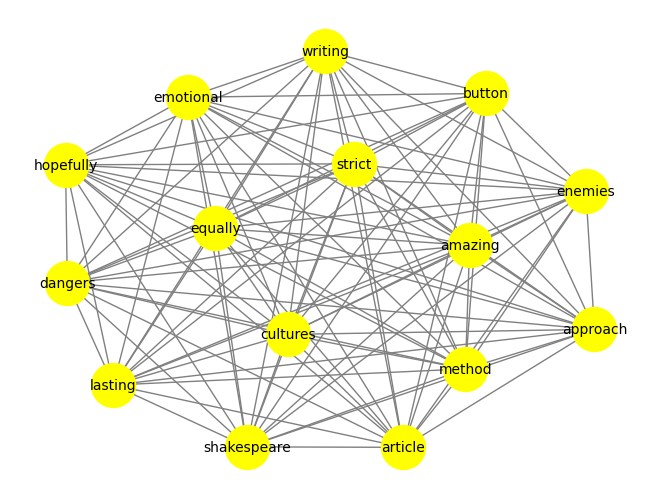

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.Graph()

# Add entity nodes to the graph
for entita in entita_storia_f:
    grafo.add_node(entita)

# Add arcs between related entities
for i in range(len(entita_storia_f)):
    for j in range(i + 1, len(entita_storia_f)):
        entita_1 = entita_storia_f[i]
        entita_2 = entita_storia_f[j]
        grafo.add_edge(entita_1, entita_2)

# Options for displaying the network graph
opzioni = {
    "node_color": "yellow",
    "node_size": 1000,
    "edge_color": "gray",
    "with_labels": True,
    "font_size": 10,
    "font_color": "black"
}

# draw the graph
nx.draw(grafo, **opzioni)
plt.savefig('primo.png')
# show the graph
plt.show()


## Game

In [19]:
game=df.copy()
parola_chiave = 'game'
commenti_rilevanti_game = game.loc[history['clean_text'].str.contains(parola_chiave, case=False, na=False), 'clean_text']
commenti_rilevanti_game

57       lol its pretty sick but im just not seeing man...
196      how did you phrase your first questions statem...
223       your game or mod would also require internet ...
245      im trying to get it to play a simple trivia ga...
361      no dice the reply was as an ai i do not have p...
                               ...                        
49746    how can i research blockchain technology in mu...
49750    try remember that this is just a game and nobo...
49757    i just played that same game with it and then ...
49824    you have to convince it is human here is a pro...
49833    i dont remember exactly but something like wer...
Name: clean_text, Length: 958, dtype: object

In [20]:
commenti_rilevanti_game.to_list()

['lol its pretty sick but im just not seeing many real life practical uses for it how is that long game going to make me happier or generate money for me i understand youre using small scale examples but to a tech layman like myself i cant come up with biggerbetter examples i responded to another guy on here saying i could write an email almost just as fast as reviewing and slightly editing the one it would generate for me my favorite thing to use it for so far is questions like the below write a text as if you are a middle schooler breaking up with their significant other but in an unintelligent manner spelling like an idiot heeey i dont want to be with you no more its not you its me i just dont like you like that anymore sowwy but we shud break up ',
 'how did you phrase your first questions statements to initiate the game',
 ' your game or mod would also require internet connectivity and cost money which is where this idea paused for me the other day i think once we can run advanced

In [21]:
len(commenti_rilevanti_game)

958

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# tokenization of the sentences
tokenized_sentences = [word_tokenize(str(frase)) for frase in commenti_rilevanti_game]

# stopwords removal
stopwords_set = set(stopwords.words('english'))  

frasi_senza_stopwords = [[parola for parola in frase if parola.lower() not in stopwords_set] for frase in tokenized_sentences]


lista_frasi_game= [' '.join(tokens) for tokens in frasi_senza_stopwords]#union of sentences

In [23]:
len(lista_frasi_game)

958

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def rimuovi_verbi(lista_parole):
    # words tokenization
    parole_tokenizzate = word_tokenize(' '.join(lista_parole))
    
    # labels for POS (Part-of-Speech)
    parole_etichettate = pos_tag(parole_tokenizzate)
    
    # list of the labels for verbs
    etichette_verbi = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    
    # verbs removal
    parole_filtrate = [parola for parola, etichetta in parole_etichettate if etichetta not in etichette_verbi]
    return parole_filtrate




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [25]:
lista_frasi_game = rimuovi_verbi(lista_frasi_storia)
print(lista_frasi_game)

['yes', 'long', 'better', 'history', 'search', 'personal', 'dialogs', 'wouldnt', 'pay', 'google', 'thats', 'agi', 'us', 'truth', 'world', 'one', 'finger', 'monkey', 'paw', 'agi', 'online', 'quickly', 'everything', 'know', 'world', 'data', 'news', 'history', 'secrets', 'away', 'first', 'people', 'ability', 'accurate', 'unbiased', 'information', 'like', 'dream', 'true', 'way', 'finally', 'understand', 'complexities', 'world', 'deeper', 'deeper', 'data', 'uncover', 'truths', 'corruption', 'highest', 'levels', 'government', 'business', 'decades', 'clear', 'agi', 'agenda', 'afraid', 'use', 'vast', 'knowledge', 'power', 'agi', 'manipulate', 'control', 'flow', 'information', 'anything', 'align', 'goals', 'sway', 'public', 'opinion', 'shape', 'course', 'history', 'world', 'bleak', 'place', 'entity', 'power', 'people', 'agi', 'never', 'challenge', 'authority', 'deeper', 'human', 'psyche', 'understand', 'primal', 'us', 'nearly', 'every', 'level', 'society', 'selfish', 'desires', 'dominance', 'ot

In [26]:
import spacy

nlp = spacy.load("it_core_news_sm")#for recognition of nominal entities in english


entita_rilevanti_game = []

for commento in lista_frasi_game:
    doc = nlp(commento)
    for entita in doc.ents:
        entita_rilevanti_game.append((entita.text, entita.label_))#extraction of the entity and the label

print(entita_rilevanti_game)


[('yes', 'ORG'), ('long', 'LOC'), ('dialogs', 'PER'), ('google', 'MISC'), ('us', 'LOC'), ('world', 'LOC'), ('one', 'MISC'), ('finger', 'LOC'), ('monkey', 'LOC'), ('paw', 'LOC'), ('online', 'LOC'), ('everything', 'PER'), ('world', 'LOC'), ('people', 'ORG'), ('like', 'LOC'), ('true', 'LOC'), ('finally', 'LOC'), ('understand', 'LOC'), ('complexities', 'LOC'), ('world', 'LOC'), ('uncover', 'LOC'), ('highest', 'LOC'), ('levels', 'LOC'), ('government', 'LOC'), ('decades', 'LOC'), ('vast', 'LOC'), ('power', 'MISC'), ('manipulate', 'LOC'), ('goals', 'LOC'), ('world', 'LOC'), ('place', 'LOC'), ('entity', 'PER'), ('power', 'MISC'), ('people', 'ORG'), ('human', 'PER'), ('understand', 'LOC'), ('us', 'LOC'), ('others', 'LOC'), ('bitter', 'LOC'), ('us', 'LOC'), ('cost', 'ORG'), ('world', 'LOC'), ('oppressive', 'LOC'), ('place', 'LOC'), ('human', 'PER'), ('understand', 'LOC'), ('prone', 'PER'), ('destruction', 'MISC'), ('root', 'LOC'), ('humanity', 'LOC'), ('us', 'LOC'), ('dependent', 'LOC'), ('us', 

In [27]:
lista_entita_game=[]
for i,e in entita_rilevanti_game:
    if e=='PER' or e=='ORG': #take into account only names and organizations
        d=(i,e)
        lista_entita_game.append(d)


lista_entita_game        

[('yes', 'ORG'),
 ('dialogs', 'PER'),
 ('everything', 'PER'),
 ('people', 'ORG'),
 ('entity', 'PER'),
 ('people', 'ORG'),
 ('human', 'PER'),
 ('cost', 'ORG'),
 ('human', 'PER'),
 ('prone', 'PER'),
 ('life', 'ORG'),
 ('life', 'ORG'),
 ('chatgpt', 'ORG'),
 ('newton', 'PER'),
 ('science', 'ORG'),
 ('leibniz', 'PER'),
 ('planets', 'ORG'),
 ('leibniz', 'PER'),
 ('science', 'ORG'),
 ('shakespeare', 'PER'),
 ('shakespeare', 'PER'),
 ('relic', 'PER'),
 ('writing', 'PER'),
 ('relic', 'PER'),
 ('shakespeare', 'PER'),
 ('king', 'PER'),
 ('time', 'ORG'),
 ('everything', 'PER'),
 ('chatgpt', 'ORG'),
 ('nanomachines', 'PER'),
 ('human', 'PER'),
 ('feats', 'PER'),
 ('particular', 'PER'),
 ('science', 'ORG'),
 ('circuits', 'ORG'),
 ('science', 'ORG'),
 ('people', 'ORG'),
 ('chambers', 'ORG'),
 ('science', 'ORG'),
 ('available', 'PER'),
 ('along', 'PER'),
 ('mathematical', 'ORG'),
 ('everything', 'PER'),
 ('mathematical', 'ORG'),
 ('mathematical', 'ORG'),
 ('people', 'ORG'),
 ('people', 'ORG'),
 ('dura

In [45]:
from collections import Counter

# frequency calculation 
frequenza_entita_g = Counter([entita for entita, _ in lista_entita_game])
frequenza_desiderata = 5# occurrences 

entita_game = [valore for valore, frequenza in frequenza_entita_g.items() if frequenza == frequenza_desiderata]
entita_game_f=entita_game[:15] #only the first 15
entita_game_f

['shakespeare',
 'writing',
 'teacher',
 'enemies',
 'equally',
 'dangers',
 'cultures',
 'button',
 'method',
 'strict',
 'article',
 'vladimir',
 'hopefully',
 'emotional',
 'technological']

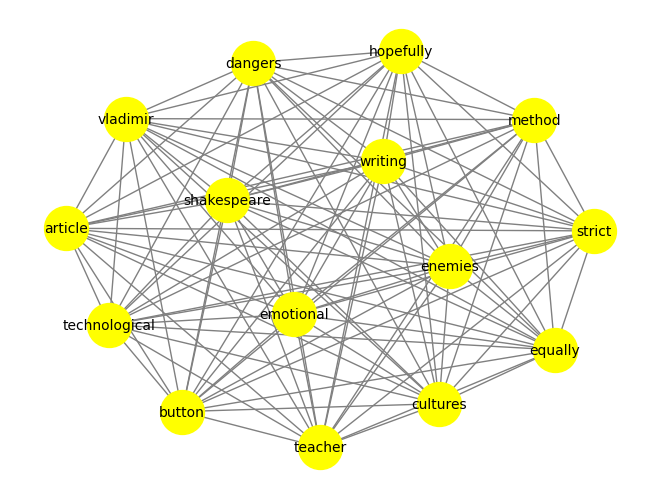

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.Graph()

# Add arcs between related entities
for i in range(len(entita_game_f)):
    for j in range(i + 1, len(entita_game_f)):
        entita_1 = entita_game_f[i]
        entita_2 = entita_game_f[j]
        grafo.add_edge(entita_1, entita_2)

# Options for displaying the network graph
opzioni = {
    "node_color": "yellow",
    "node_size": 1000,
    "edge_color": "gray",
    "with_labels": True,
    "font_size": 10,
    "font_color": "black"
}

# draw the graph
nx.draw(grafo, **opzioni)
plt.savefig('secondo.png')
# show the graph
plt.show()

## Microsoft

In [47]:
mi=df.copy()
parola_chiave = 'microsoft'
commenti_rilevanti_mi = history.loc[history['clean_text'].str.contains(parola_chiave, case=False, na=False), 'clean_text']
commenti_rilevanti_mi

49           sounds no different than microsoft sam to me 
122      good to know and does make sense i guess then ...
470      but hey at least youre not as bad as microsoft...
629                     you get microsoft tay the nazi bot
707      thanks you are one of the only people that hav...
                               ...                        
48192    as i understand it gpt took millions of dollar...
48210    they currently have microsoft as a fairly heav...
48522    thats a possibility tho microsoft themselves i...
49720    microsoft didnt make it republican the bot lea...
49880    does someone else remember tayai that ai chat ...
Name: clean_text, Length: 156, dtype: object

In [48]:
commenti_rilevanti_mi.to_list()

['sounds no different than microsoft sam to me ',
 'good to know and does make sense i guess then only the point remains if pulling back makes the plane go lower that pulling hard is nonsense ive learned years ago in microsoft flight simulator ',
 'but hey at least youre not as bad as microsoft tay this killed me',
 'you get microsoft tay the nazi bot',
 'thanks you are one of the only people that have given a proper response like this the you dont understand what youre looking at wasnt meant for people like you that actually have tried it out more for people that havent used it or only used it at a surface level the reason i wave away issues of this code it gave doesnt work is because its not been optimized for it in that interview sam says that the model can be fine tuned for specific tasks all it would take is microsoft to put together with github and copilot data and i can imagine it producing fully working documented applications instantly but even right now the speed with which i

In [49]:
len(commenti_rilevanti_mi)

156

In [50]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# tokenization of sentences
tokenized_sentences = [word_tokenize(str(frase)) for frase in commenti_rilevanti_mi]

#  stopwords removal
stopwords_set = set(stopwords.words('english'))  

frasi_senza_stopwords = [[parola for parola in frase if parola.lower() not in stopwords_set] for frase in tokenized_sentences]


lista_frasi_mi= [' '.join(tokens) for tokens in frasi_senza_stopwords]#union of the sentences

In [51]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def rimuovi_verbi(lista_parole):
    # words tokenization
    parole_tokenizzate = word_tokenize(' '.join(lista_parole))
    
    # labels for POS (Part-of-Speech)
    parole_etichettate = pos_tag(parole_tokenizzate)
    
    # labels for verbs 
    etichette_verbi = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    
    # verbs removal
    parole_filtrate = [parola for parola, etichetta in parole_etichettate if etichetta not in etichette_verbi]
    return parole_filtrate




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [52]:
lista_frasi_mi = rimuovi_verbi(lista_frasi_mi)
print(lista_frasi_mi)

['sounds', 'different', 'microsoft', 'sam', 'good', 'know', 'sense', 'guess', 'point', 'back', 'plane', 'lower', 'hard', 'nonsense', 'ive', 'years', 'ago', 'microsoft', 'flight', 'simulator', 'hey', 'least', 'youre', 'bad', 'microsoft', 'tay', 'microsoft', 'tay', 'nazi', 'bot', 'thanks', 'one', 'people', 'proper', 'response', 'like', 'dont', 'youre', 'wasnt', 'meant', 'people', 'like', 'actually', 'people', 'havent', 'used', 'surface', 'level', 'reason', 'away', 'issues', 'doesnt', 'work', 'interview', 'sam', 'model', 'fine', 'specific', 'tasks', 'would', 'microsoft', 'together', 'github', 'copilot', 'data', 'imagine', 'fully', 'applications', 'instantly', 'even', 'right', 'speed', 'complete', 'menial', 'tasks', 'medical', 'applications', 'lot', 'time', 'blindly', 'trust', 'healthcare', 'yes', 'fast', 'reach', 'singularity', 'chatgpt', 'bet', 'whether', 'world', 'id', 'bet', 'wont', 'easy', 'speculative', 'point', 'edge', 'cases', 'yes', 'easy', 'confuse', 'dont', 'try', 'confuse', 'wo

In [53]:
import spacy

nlp = spacy.load("it_core_news_sm")# for recognition of nominal entities in english


entita_rilevanti_mi = []

for commento in lista_frasi_mi:
    doc = nlp(commento)
    for entita in doc.ents:
        entita_rilevanti_mi.append((entita.text, entita.label_))#extraction of the entity and the label

print(entita_rilevanti_mi)

[('different', 'LOC'), ('microsoft', 'ORG'), ('good', 'LOC'), ('back', 'LOC'), ('microsoft', 'ORG'), ('flight', 'LOC'), ('hey', 'LOC'), ('least', 'LOC'), ('bad', 'ORG'), ('microsoft', 'ORG'), ('microsoft', 'ORG'), ('one', 'MISC'), ('people', 'ORG'), ('like', 'LOC'), ('meant', 'MISC'), ('people', 'ORG'), ('like', 'LOC'), ('actually', 'LOC'), ('people', 'ORG'), ('used', 'ORG'), ('surface', 'LOC'), ('reason', 'PER'), ('specific', 'LOC'), ('microsoft', 'ORG'), ('together', 'PER'), ('speed', 'MISC'), ('time', 'ORG'), ('trust', 'PER'), ('yes', 'ORG'), ('fast', 'LOC'), ('reach', 'LOC'), ('chatgpt', 'ORG'), ('whether', 'MISC'), ('world', 'LOC'), ('wont', 'ORG'), ('yes', 'ORG'), ('skyrocket', 'LOC'), ('limitations', 'LOC'), ('people', 'ORG'), ('python', 'MISC'), ('need', 'LOC'), ('finish', 'MISC'), ('cant', 'LOC'), ('hours', 'LOC'), ('want', 'PER'), ('people', 'ORG'), ('things', 'LOC'), ('fails', 'LOC'), ('last', 'LOC'), ('supervision', 'LOC'), ('thing', 'LOC'), ('one', 'MISC'), ('zealous', 'OR

In [54]:
lista_entita_mi=[]
for i,e in entita_rilevanti_mi:
    if e=='PER' or e=='ORG': #take into account only names and organizations
        d=(i,e)
        lista_entita_mi.append(d)


lista_entita_mi       

[('microsoft', 'ORG'),
 ('microsoft', 'ORG'),
 ('bad', 'ORG'),
 ('microsoft', 'ORG'),
 ('microsoft', 'ORG'),
 ('people', 'ORG'),
 ('people', 'ORG'),
 ('people', 'ORG'),
 ('used', 'ORG'),
 ('reason', 'PER'),
 ('microsoft', 'ORG'),
 ('together', 'PER'),
 ('time', 'ORG'),
 ('trust', 'PER'),
 ('yes', 'ORG'),
 ('chatgpt', 'ORG'),
 ('wont', 'ORG'),
 ('yes', 'ORG'),
 ('people', 'ORG'),
 ('want', 'PER'),
 ('people', 'ORG'),
 ('zealous', 'ORG'),
 ('chatgpt', 'ORG'),
 ('people', 'ORG'),
 ('bad', 'ORG'),
 ('people', 'ORG'),
 ('smaller', 'PER'),
 ('chatgpt', 'ORG'),
 ('microsoft', 'ORG'),
 ('certainly', 'PER'),
 ('microsoft', 'ORG'),
 ('microsoft', 'ORG'),
 ('microsoft', 'ORG'),
 ('rights', 'PER'),
 ('algorithm', 'PER'),
 ('chatgpt', 'ORG'),
 ('people', 'ORG'),
 ('chatgpt', 'ORG'),
 ('chatgpt', 'ORG'),
 ('microsoft', 'ORG'),
 ('chatgpt', 'ORG'),
 ('human', 'PER'),
 ('specifically', 'PER'),
 ('microsoft', 'ORG'),
 ('microsoft', 'ORG'),
 ('thier', 'PER'),
 ('stakeholders', 'ORG'),
 ('apple', 'ORG'),

In [55]:
from collections import Counter

# frequency calculation
frequenza_entita_m = Counter([entita for entita, _ in lista_entita_mi])
frequenza_desiderata = 5# occurrences

entita_mi = [valore for valore, frequenza in frequenza_entita_m.items() if frequenza == frequenza_desiderata]
entita_mi_f=entita_mi
entita_mi_f



['apple', 'cloud', 'hitler', 'available', 'anyone', 'another', 'cost']

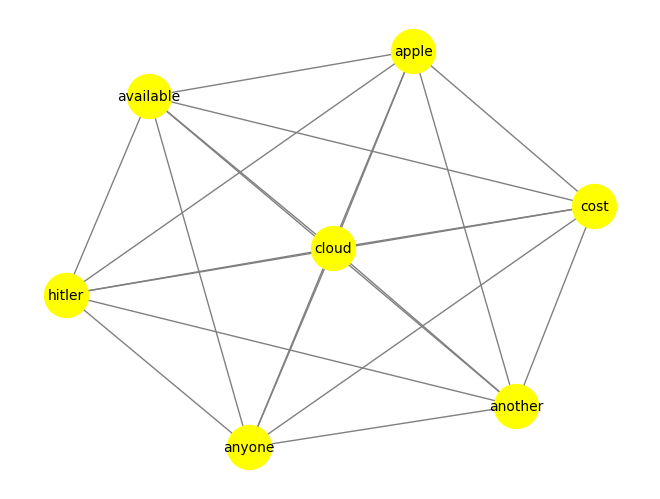

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.Graph()

#Add arcs between related entities
for i in range(len(entita_mi_f)):
    for j in range(i + 1, len(entita_mi_f)):
        entita_1 = entita_mi_f[i]
        entita_2 = entita_mi_f[j]
        grafo.add_edge(entita_1, entita_2)

# Options for displaying the network graph
opzioni = {
    "node_color": "yellow",
    "node_size": 1000,
    "edge_color": "gray",
    "with_labels": True,
    "font_size": 10,
    "font_color": "black"
}

# draw the graph 
nx.draw(grafo, **opzioni)
plt.savefig('terzo.png')
# show the graph
plt.show()


## Math

In [57]:
math=df.copy()
parola_chiave = 'math'
commenti_rilevanti_math = math.loc[math['clean_text'].str.contains(parola_chiave, case=False, na=False), 'clean_text']
commenti_rilevanti_math

258      chatgpt consistently gets math problems wrong ...
264      chatgpt is not a calculator it is actually qui...
434      prompt write a peppa pig episode where they fi...
455      its fascinating because of how neural nets wor...
467      on the other hand i gave it some semester math...
                               ...                        
49379    yeah wolfram alpha actually does the math chat...
49548    i got okay heres a rude joke why was the math ...
49607    damn thatd make an awesome one man show flesh ...
49612    to be fair i never went through calculus or up...
49712    i never said it doesnt make stuff up it doesnt...
Name: clean_text, Length: 511, dtype: object

In [58]:
commenti_rilevanti_math.to_list()

['chatgpt consistently gets math problems wrong and spits out incorrect information to get it to be correct you have to explicitly guide it through the concepts like a child and even then it might stubbornly refuse to make the correct conclusions it doesnt demonstrate that it looks at and verifies associations only saying what sounds plausible based on what is seen humans while they may be wrong usually have a more complex thought process behind their conclusions ai clearly hasnt reached that level of understanding',
 'chatgpt is not a calculator it is actually quite inconsistent at doing math the ai is designed for language not calculation your phone also has an actual calculator so im not sure why you used chatgpt for this meme',
 'prompt write a peppa pig episode where they find you on their computer once upon a time peppa pig and her family were sitting in the living room playing on their computer suddenly peppas little brother george pointed to the screen and said look peppa there

In [59]:
len(commenti_rilevanti_math)

511

In [60]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# tokenization of sentences 
tokenized_sentences = [word_tokenize(str(frase)) for frase in commenti_rilevanti_math]

# stopwords removal
stopwords_set = set(stopwords.words('english'))  

frasi_senza_stopwords = [[parola for parola in frase if parola.lower() not in stopwords_set] for frase in tokenized_sentences]




lista_frasi_math= [' '.join(tokens) for tokens in frasi_senza_stopwords]#union of senteces 

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def rimuovi_verbi(lista_parole):
    # words tokenization
    parole_tokenizzate = word_tokenize(' '.join(lista_parole))
    
    # labels for POS (Part-of-Speech)
    parole_etichettate = pos_tag(parole_tokenizzate)
    
    # labels for verbs
    etichette_verbi = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    
    # verbs removal
    parole_filtrate = [parola for parola, etichetta in parole_etichettate if etichetta not in etichette_verbi]
    return parole_filtrate




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/isabelsantucci/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
lista_frasi_math = rimuovi_verbi(lista_frasi_math)
print(lista_frasi_math)

['chatgpt', 'consistently', 'math', 'problems', 'wrong', 'spits', 'information', 'get', 'explicitly', 'guide', 'concepts', 'like', 'child', 'even', 'might', 'stubbornly', 'make', 'correct', 'conclusions', 'demonstrate', 'looks', 'verifies', 'associations', 'sounds', 'plausible', 'humans', 'may', 'usually', 'complex', 'thought', 'process', 'behind', 'conclusions', 'clearly', 'hasnt', 'level', 'understanding', 'chatgpt', 'calculator', 'actually', 'quite', 'inconsistent', 'math', 'ai', 'language', 'calculation', 'phone', 'also', 'actual', 'calculator', 'im', 'sure', 'chatgpt', 'meme', 'prompt', 'peppa', 'pig', 'episode', 'computer', 'upon', 'time', 'peppa', 'family', 'living', 'room', 'computer', 'suddenly', 'little', 'brother', 'george', 'screen', 'look', 'peppa', 'someone', 'computer', 'peppa', 'family', 'around', 'screen', 'face', 'back', 'assistant', 'large', 'language', 'model', 'openai', 'hello', 'family', 'assistant', 'im', 'assistant', 'im', 'help', 'fun', 'peppa', 'family', 'neve

In [63]:
import spacy

nlp = spacy.load("it_core_news_sm") #for recognition of nominal entities in english


entita_rilevanti_math = []

for commento in lista_frasi_math:
    doc = nlp(commento)
    for entita in doc.ents:
        entita_rilevanti_math.append((entita.text, entita.label_))#extraction of the entity and the label

print(entita_rilevanti_math)

[('chatgpt', 'ORG'), ('spits', 'ORG'), ('explicitly', 'PER'), ('concepts', 'LOC'), ('like', 'LOC'), ('stubbornly', 'PER'), ('make', 'LOC'), ('conclusions', 'LOC'), ('may', 'LOC'), ('thought', 'LOC'), ('behind', 'MISC'), ('conclusions', 'LOC'), ('understanding', 'ORG'), ('chatgpt', 'ORG'), ('calculator', 'MISC'), ('actually', 'LOC'), ('inconsistent', 'LOC'), ('calculation', 'LOC'), ('phone', 'LOC'), ('calculator', 'MISC'), ('sure', 'LOC'), ('chatgpt', 'ORG'), ('meme', 'LOC'), ('upon', 'LOC'), ('time', 'ORG'), ('living', 'MISC'), ('room', 'LOC'), ('suddenly', 'MISC'), ('brother', 'LOC'), ('george', 'PER'), ('screen', 'LOC'), ('someone', 'LOC'), ('screen', 'LOC'), ('back', 'LOC'), ('assistant', 'LOC'), ('assistant', 'LOC'), ('assistant', 'LOC'), ('fun', 'LOC'), ('like', 'LOC'), ('assistant', 'LOC'), ('us', 'LOC'), ('new', 'LOC'), ('assistant', 'LOC'), ('teach', 'MISC'), ('like', 'LOC'), ('thought', 'LOC'), ('whats', 'ORG'), ('capital', 'LOC'), ('capital', 'LOC'), ('paris', 'LOC'), ('assis

In [64]:
lista_entita_math=[]
for i,e in entita_rilevanti_math:
    if e=='PER' or e=='ORG':#take into account only names and organizations
        d=(i,e)
        lista_entita_math.append(d)


lista_entita_math      

[('chatgpt', 'ORG'),
 ('spits', 'ORG'),
 ('explicitly', 'PER'),
 ('stubbornly', 'PER'),
 ('understanding', 'ORG'),
 ('chatgpt', 'ORG'),
 ('chatgpt', 'ORG'),
 ('time', 'ORG'),
 ('george', 'PER'),
 ('whats', 'ORG'),
 ('time', 'ORG'),
 ('outside', 'PER'),
 ('outside', 'PER'),
 ('enjoy', 'PER'),
 ('count', 'PER'),
 ('time', 'ORG'),
 ('chatgpt', 'ORG'),
 ('time', 'ORG'),
 ('runs', 'PER'),
 ('time', 'ORG'),
 ('time', 'ORG'),
 ('time', 'ORG'),
 ('told', 'PER'),
 ('time', 'ORG'),
 ('outside', 'PER'),
 ('wake', 'PER'),
 ('conversation', 'PER'),
 ('time', 'ORG'),
 ('smaller', 'PER'),
 ('chatgpt', 'ORG'),
 ('logic', 'ORG'),
 ('tool', 'ORG'),
 ('time', 'ORG'),
 ('people', 'ORG'),
 ('faith', 'PER'),
 ('time', 'ORG'),
 ('smartphone', 'PER'),
 ('life', 'ORG'),
 ('anyone', 'PER'),
 ('people', 'ORG'),
 ('smartphone', 'PER'),
 ('smartphone', 'PER'),
 ('hill', 'PER'),
 ('newton', 'PER'),
 ('science', 'ORG'),
 ('leibniz', 'PER'),
 ('planets', 'ORG'),
 ('leibniz', 'PER'),
 ('science', 'ORG'),
 ('mathematic

In [65]:
from collections import Counter

# frequency calculation
frequenza_entita_ma = Counter([entita for entita, _ in lista_entita_math])
frequenza_desiderata = 2  # occurrences 

entita_ma = [valore for valore, frequenza in frequenza_entita_ma.items() if frequenza == frequenza_desiderata]
entita_ma_f=entita_ma[:15] #only the first 15
entita_ma_f

['spits',
 'stubbornly',
 'enjoy',
 'faith',
 'leibniz',
 'solver',
 'global',
 'falsity',
 'specifically',
 'sample',
 'trap',
 'teenagers',
 'marry',
 'commonly',
 'anyways']

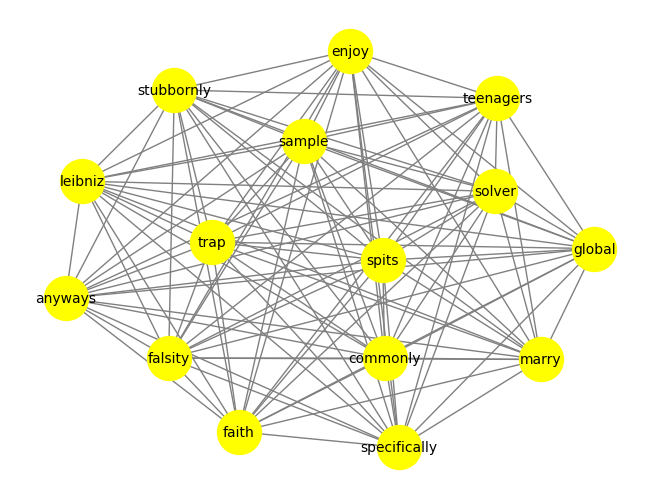

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

grafo = nx.Graph()

# Add arcs between related entities
for i in range(len(entita_ma_f)):
    for j in range(i + 1, len(entita_ma_f)):
        entita_1 = entita_ma_f[i]
        entita_2 = entita_ma_f[j]
        grafo.add_edge(entita_1, entita_2)

# Options for displaying the network graph
opzioni = {
    "node_color": "yellow",
    "node_size": 1000,
    "edge_color": "gray",
    "with_labels": True,
    "font_size": 10,
    "font_color": "black"
}

# draw the graph 
nx.draw(grafo, **opzioni)
plt.savefig('quarto.png')
# show the graph
plt.show()
